In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
login = pd.read_csv('data/login.csv', encoding='gbk')
study = pd.read_csv('data/study_information.csv', encoding='gbk')
users = pd.read_csv('data/users.csv', encoding='gbk')

In [3]:
pd.DataFrame(login.isna().sum())

,0
user_id,0
login_time,0
login_place,0


In [4]:
print(study.shape)
pd.DataFrame(study.isna().sum())

(194974, 5)


,0
user_id,0
course_id,0
course_join_time,0
learn_process,0
price,4238


In [5]:
pd.DataFrame(study.price.value_counts())

,price
0.0,71088
199.0,32136
299.0,29681
129.0,19787
109.0,11352
499.0,7712
319.0,4844
179.0,3053
3000.0,2823
99.0,1513


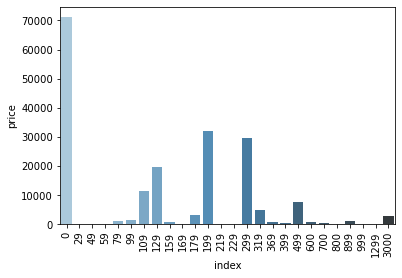

In [6]:
study.price.value_counts().sort_index().plot.bar()
a = pd.DataFrame(study.price.value_counts().sort_index()).reset_index()
a['index'] = a['index'].astype('int')
sb.barplot(x=a['index'], y=a.price, palette="Blues_d")
sb.barplot(x=a['index'], y=a.price, palette="Blues_d").get_figure().savefig('results/task1_1_1.svg')

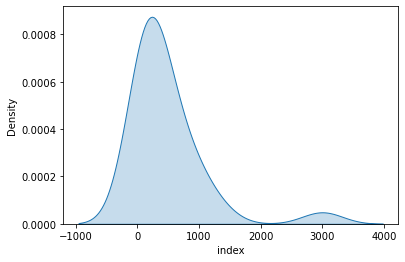

In [7]:
sb.kdeplot(a['index'][1:], shade=True).get_figure().savefig('results/task1_1_2.svg')

In [8]:
temp = pd.DataFrame(study.price.value_counts())
temp = temp[temp.price > 10000]
temp['count'] = temp.index*temp.price
# study.price.fillna(temp['count'].sum()/temp['price'].sum(), inplace=True)
study.price.fillna(0, inplace=True)
pd.DataFrame(study.isna().sum())

,0
user_id,0
course_id,0
course_join_time,0
learn_process,0
price,0


In [9]:
print(users.shape)
pd.DataFrame(users.isna().sum())

(43983, 7)


,0
user_id,67
register_time,0
recently_logged,0
number_of_classes_join,0
number_of_classes_out,0
learn_time,0
school,33412


In [10]:
users.school.fillna('NaN', inplace=True)
# pd.DataFrame(users.school.value_counts())
pd.DataFrame(users.isna().sum())

,0
user_id,67
register_time,0
recently_logged,0
number_of_classes_join,0
number_of_classes_out,0
learn_time,0
school,0


In [11]:
users.dropna(inplace=True)
users.drop_duplicates(subset=['user_id'], keep='last', inplace=True)

In [12]:
login.drop_duplicates(inplace=True)
study.drop_duplicates(inplace=True)

In [13]:
login.to_csv('results/task1_1_1.csv', index=False)
study.to_csv('results/task1_1_2.csv', index=False)
users.to_csv('results/task1_1_3.csv', index=False)